# Render Zap for Player Explosion

In [1]:
#Import libraries
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [9]:
colors = {
    -1: "pink",
    0: "white",
    240: "red",
    143: "green",
    15: "yellow",
    255: "purple",
    136: "grey",
    128: "navy",
    43: "cyan"
}

def getVerticesAndConns(l, color="blue"):
    i = 0
    vertices = []
    while l[i]:
        x,y,z = l[i],l[i+1],l[i+2]
        i+=3
        conns = []
        while l[i]:
            if l[i] == -1:
                i+=1
                color = colors[l[i]]
            else:
                conns+=[(l[i],color)]
            i+=1
        vertices += [((x,y,z),conns)]
        i+=1
    return vertices

def plotObject(vertices):
    fig = plt.figure(figsize=(7,7))
    ax = plt.axes(projection='3d')
    ax.view_init(azim=135,elev=20,vertical_axis="y")
    ax.yaxis.set_inverted(True) 
    ax.xaxis.set_inverted(True) 
    ax.xaxis.set_pane_color("black")
    ax.yaxis.set_pane_color("black")
    ax.zaxis.set_pane_color("black")
    plt.rcParams['grid.color'] = "navy"

    for (x,y,z),conns in vertices:
        for conn,color in conns:
            x1,y1,z1 = vertices[conn-1][0]
            xs = np.array([[x,x1]])
            ys = np.array([[y,y1]])
            zs = np.array([[z,z1]])
            ax.plot_wireframe(xs,ys,zs,color=color,linewidth=3.0)
    plt.savefig("zap/zap.png", transparent=True,bbox_inches='tight')



## Render the zap

[((3, 3, 1), [(2, 'yellow'), (10, 'yellow')]), ((8, 7, 1), [(3, 'yellow')]), ((14, 3, 1), [(4, 'yellow')]), ((12, 8, 1), [(5, 'yellow')]), ((16, 12, 1), [(6, 'yellow')]), ((11, 11, 1), [(7, 'yellow')]), ((10, 16, 1), [(8, 'yellow')]), ((7, 11, 1), [(9, 'yellow')]), ((3, 13, 1), [(10, 'yellow')]), ((6, 8, 1), [])]


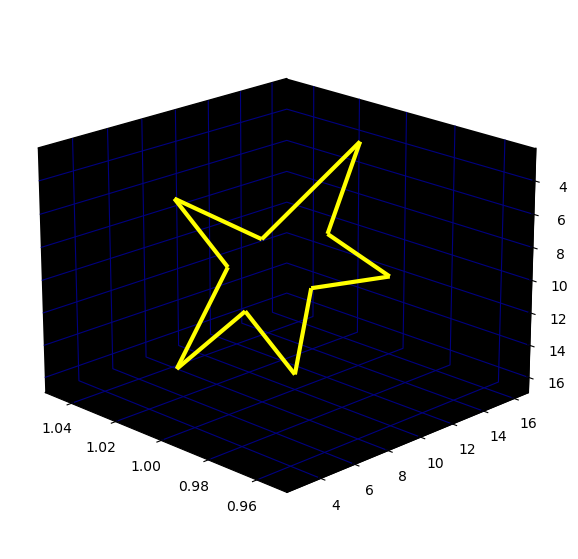

In [10]:
claws = """
zap:    dc.b 3,3,1,2,10,0
        dc.b 8,7,1,3,0
        dc.b 14,3,1,4,0
        dc.b 12,8,1,5,0
        dc.b 16,12,1,6,0
        dc.b 11,11,1,7,0
        dc.b 10,16,1,8,0
        dc.b 7,11,1,9,0
        dc.b 3,13,1,10,0
        dc.b 6,8,1,0,0
"""

d = claws
ls = [[int(x) for x in ','.join([x for x in p.split() if ',' in x]).split(',')]
     for p in d.split('\n\n')]
for l in ls:
    vertices = getVerticesAndConns(l,"yellow")
    print(vertices)
    plotObject(vertices)
